In [8]:
import numpy as np
def softmax_stable(Z):
    e_Z=np.exp(Z-np.max(Z,axis=1,keepdims=True))
    A=e_Z/e_Z.sum(axis=1,keepdims=True)
    return A

def crossentropy_loss(Yhat,y):
    """
    Yhat: a numpy array of shape (Npoints, nClasses) -- predicted output
    y: a numpy array of shape (Npoints) -- ground truth.
    NOTE: We don’t need to use the one-hot vector here since most of elements
    are zeros. When programming in numpy, in each row of Yhat, we need to access
    to the corresponding index only.
    """
    id0=range(Yhat.shape[0])
    return -np.mean(np.log(Yhat[id0,y]))

def mlp_init(d0,d1,d2):
    """
    d0: dimentions of input data
    d1: number of hidden unit
    d2:number of output unit= number of classes
    """
    W1=0.01*np.random.rand(d0,d1)
    b1=np.zeros(d1)
    W2=0.01*np.random.rand(d1,d2)
    b2=np.zeros(d2)
    return (W1,b1,W2,b2)

def mlp_predict(X,W1,b1,W2,b2):
    Z1=X.dot(W1)+b1 #shape (N,d1)
    A1=np.maximum(Z1,0) #shape(N,d1)
    Z2=A1.dot(W2)+b2 #shape(N,d2)
    
    return np.argmax(Z2,axis=1)
    
def mlp_fit(X,y,W1,b1,W2,b2,eta):
    loss_hist=[]
    
    for i in range(30000): #numer of epoches
        Z1=X.dot(W1)+b1
        A1=np.maximum(Z1,0) #shape(N,d1)
        Z2=A1.dot(W2)+b2
        Yhat=softmax_stable(Z2) #shape (N,d2)
        
        if i%1000==0: #print loss after each 1000 iterations
            loss=crossentropy_loss(Yhat,y)
            print("inter {} loss: {}".format(i,loss))
            loss_hist.append(loss)
            
        #back propagation
        id0=range(Yhat.shape[0])
        Yhat[id0,y]-=1
        E2=Yhat/N
        dW2 = np.dot(A1.T, E2) # shape (d1, d2)
        db2 = np.sum(E2, axis = 0) # shape (d2,)
        E1 = np.dot(E2, W2.T) # shape (N, d1)
        E1[Z1 <= 0] = 0 # gradient of ReLU, shape (N, d1)
        dW1 = np.dot(X.T, E1) # shape (d0, d1)
        db1 = np.sum(E1, axis = 0) # shape (d1,)
        
        W1+=-eta*dW1
        b1+=-eta*db1
        W2+=-eta*dW2
        b2+=-eta*db2
        
    return (W1,b1,W2,b2,loss_hist)

means = [[-1, -1], [1, -1], [0, 1]]
cov = [[1, 0], [0, 1]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0)
y = np.asarray([0]*N + [1]*N + [2]*N)


# suppose X, y are training input and output, respectively
d0 = 2 # data dimension
d1 = h = 150 # number of hidden units
d2 = C = 3 # number of classes
eta = 0.5 # learning rate
(W1, b1, W2, b2) = mlp_init(d0, d1, d2)
(W1, b1, W2, b2, loss_hist) =mlp_fit(X, y, W1, b1, W2, b2, eta)
y_pred = mlp_predict(X, W1, b1, W2, b2)
acc = 100*np.mean(y_pred == y)
print('training accuracy:',acc)

inter 0 loss: 1.098576591798379
inter 1000 loss: 0.3022161158687518
inter 2000 loss: 0.3337867057736681
inter 3000 loss: 0.15372626781968135
inter 4000 loss: 0.3239422550186436
inter 5000 loss: 0.0523382834723485
inter 6000 loss: 0.039753339455517664
inter 7000 loss: 0.07984616176385714
inter 8000 loss: 0.0371245342276507
inter 9000 loss: 0.011001110155149941
inter 10000 loss: 0.004889617008737862
inter 11000 loss: 0.0031259892826571867
inter 12000 loss: 0.0022729057439196064
inter 13000 loss: 0.0017890596497294228
inter 14000 loss: 0.0014701903323376504
inter 15000 loss: 0.0012442346022121637
inter 16000 loss: 0.0010750079515319214
inter 17000 loss: 0.0009452523007129169
inter 18000 loss: 0.0008406169855982901
inter 19000 loss: 0.0007570285309612782
inter 20000 loss: 0.0006883133537139266
inter 21000 loss: 0.000629135653653911
inter 22000 loss: 0.0005793337148235993
inter 23000 loss: 0.0005365424233156884
inter 24000 loss: 0.000499217325412277
inter 25000 loss: 0.0004666933635385185
i

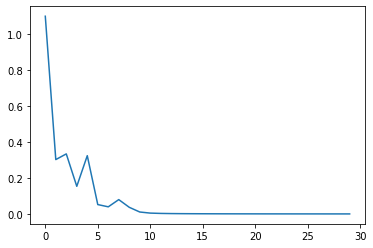

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(len(loss_hist)),loss_hist)
plt.show()